# Rappel du jour 3 

* décorateurs
    * on n'oublie pas le `wraps(f)` pour être poli avec ses utilisateurs
* mise en cache à l'aide de décorateurs
* arguments génériques `*args`, `**kwargs`
* ouverture de CSV / pandas
* tests unitaires
    * on peut tester facilement des fonctions pures (qui un jeu d'entrée vont avoir toujours le même résultat)
    * si les fonctions ne sont pas pures => on doit simuler le monde extérieur (on utilise le `mocking`)
* POO
    * compréhension de `self`
    * héritage 

In [6]:
import functools

def decorateur(f):
    @functools.wraps(f)
    def wrapper(*args, **kwargs):
        res = f(*args, **kwargs)
        return res
    return wrapper

@decorateur
def toto():
    pass


print(toto)

<function toto at 0x11133c160>


# Context managers

https://realpython.com/python-with-statement/

In [23]:
with open("./requirements_and_venv.md") as f:
    print(f.closed)
    1/0
    f.readlines()
    
f.closed

False


ZeroDivisionError: division by zero

In [24]:
print(f.closed)

True


In [25]:
# code équivalent sans contexte manager
f = open("./requirements_and_venv.md")
try:
    f.readlines()
finally:
    f.close()

In [26]:
import threading

class MyLock:
    def __init__(self, mon_verrou):
        self.lock = mon_verrou 
        
    def __enter__(self):
        print("on prend le verrou")
        self.lock.acquire()
        print("on vient de le prendre")

    def __exit__(self, *args):
        print("on relache le verrou")
        self.lock.release()
        print("on vient de le relacher")


mon_lock = MyLock(threading.Lock())
with mon_lock:
    print("salut")
    1/0

on prend le verrou
on vient de le prendre
salut
on relache le verrou
on vient de le relacher


ZeroDivisionError: division by zero

# Accès aux attributs en POO en python

In [41]:
class Acces:
    def __init__(self):
        self.a = 1
        self.b = 2

    def compute(self):
        return self.a + self.b
    
    def get_a(self):
        print("on est en train de récupérer a")
        return self.a

    def set_a(self, value):
        print("plein de vérifications sur la valeurs")
        self.a = value 

In [42]:
acces = Acces()
acces.get_a()

on est en train de récupérer a


1

In [43]:
acces.set_a(3)

plein de vérifications sur la valeurs


In [44]:
acces.compute()

5

In [45]:
acces.a = 345

In [53]:
class TemperatureConverter:
    def __init__(self, k):
        self.kelvin = k 

    def get_celcius(self):
        print("access au celcius")
        return self.kelvin - 273.15

    def set_celcius(self, value):
        print("setting des celcius")
        self.kelvin = value + 273.15

    celcius = property(get_celcius, set_celcius)

In [54]:
tc = TemperatureConverter(10)
tc.celcius

access au celcius


-263.15

In [55]:
tc.celcius = 12
tc.kelvin

setting des celcius


285.15

In [58]:
class TemperatureConverter:
    def __init__(self, k):
        self.kelvin = k 

    @property
    def celcius(self):
        print("access au celcius")
        return self.kelvin - 273.15

In [59]:
tc = TemperatureConverter(10)
tc.celcius
tc.celcius = 12
tc.kelvin

access au celcius


AttributeError: can't set attribute 'celcius'

# exercice sur l'acces aux attributs

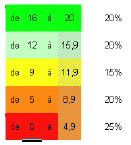

```python
n = Note(15)
n.nombre = 25 ## ça refuse 
n.nombre = -3 ## ça reduse => les notes c'est entre 0 et 20 
n.nombre # => 15
n.couleur # => "vert"
n.couleur = "jaune" # => pas possible
n.nombre = 20
n.couleur = "vert fluo" 
````

In [223]:
class Note:
    def __init__(self, note):
        # self.validate_note(note)
        # self.__nombre = note
        self.nombre = note
    
    @property
    def nombre(self):
        return self.__nombre
    
    @nombre.setter
    def nombre(self, value):
        self.validate_note(value)
        self.__nombre = value

    @staticmethod
    def validate_note(self, value):
        print(value)
        if not 0 <= value <= 20:
            raise ValueError("une note c'est entre 0 et 20")
        if not isinstance(value, int):
            raise TypeError("une note c'est un nombre entier")

    @staticmethod
    def compute_couleur(valeur):
        if valeur < 5:
            return "rouge"
        elif valeur < 9:
            return "orange"
        elif valeur < 12:
            return "jaune"
        elif valeur < 16:
            return "vert"
        elif valeur <= 20:
            return "vert fluo"
        else:
            raise ValueError(f"ne devrait pas arriver. La note est {valeur}")

    
    @property
    def couleur(self):
        return self.compute_couleur()
    
    def __str__(self):
        return f"La note est de {self.nombre} (catégorie {self.couleur})"

In [224]:
n = Note(10)
n.nombre = 19

TypeError: Note.validate_note() missing 1 required positional argument: 'value'

In [225]:
n.nombre = 15

15


In [226]:
n.nombre
n.couleur

'vert'

In [227]:
n.nombre = 0.5

0.5


TypeError: une note c'est un nombre entier

In [228]:
print(n)

La note est de 15 (catégorie vert)


In [229]:
n.nombre = 25

25


ValueError: une note c'est entre 0 et 20

In [230]:
n.couleur = "jaune"

AttributeError: can't set attribute 'couleur'

In [231]:
class Exemple():
    def __init__(self, attribut):
        self.attribut = attribut
    def methode(self, param): 
        print(self, type(self)) 
        return self.attribut + param

e = Exemple(10) 
print(e.methode(2))

<__main__.Exemple object at 0x114d59c30> <class '__main__.Exemple'>
12


In [233]:
Exemple.methode(e, 2)

<__main__.Exemple object at 0x114d59c30> <class '__main__.Exemple'>


12

In [235]:
class Exemple(): 
    variable_de_classe = 1
    
    @classmethod
    def methode_de_classe(cls, param): 
        print(cls, type(cls))
        return cls.variable_de_classe + param

In [239]:
Exemple.methode_de_classe(2)

<class '__main__.Exemple'> <class 'type'>


3